# Load data

In [1]:
from sklearn import cluster
from neupy import algorithms

import data
import plot
import evaluation
from conf import N_CLUSTERS


data_bin, words, dim = data.load_vectors("binvectors256.vec", read_first_words = 10000, sample_words=1000)

# Cluster using ART1
## Cluster visualization

Silhouette score: -0.004586388843975266


clusters,0,1,2,3,4,5,6,7,8,9
0,.,by,which,but,an,will,so,only,what,!
1,name,11,think,both,without,many,me,than,my,those
2,,2008,president,study,official,place,Thank,always,She,women
3,,public,candidate,must,remove,sources,April,fact,comments,men
4,,why,Syria,language,encyclopedia,well,head,available,User,There
5,,family,knows,end,vehicle,really,banks,clear,student,recent
6,,school,holds,job,N,something,remember,adding,'m,million
7,,issues,roads,programs,Press,find,advice,named,am,events
8,,water,factory,users,Team,today,interests,correct,earlier,schools
9,,further,doors,standard,versus,economy,Turkey,single,culture,games


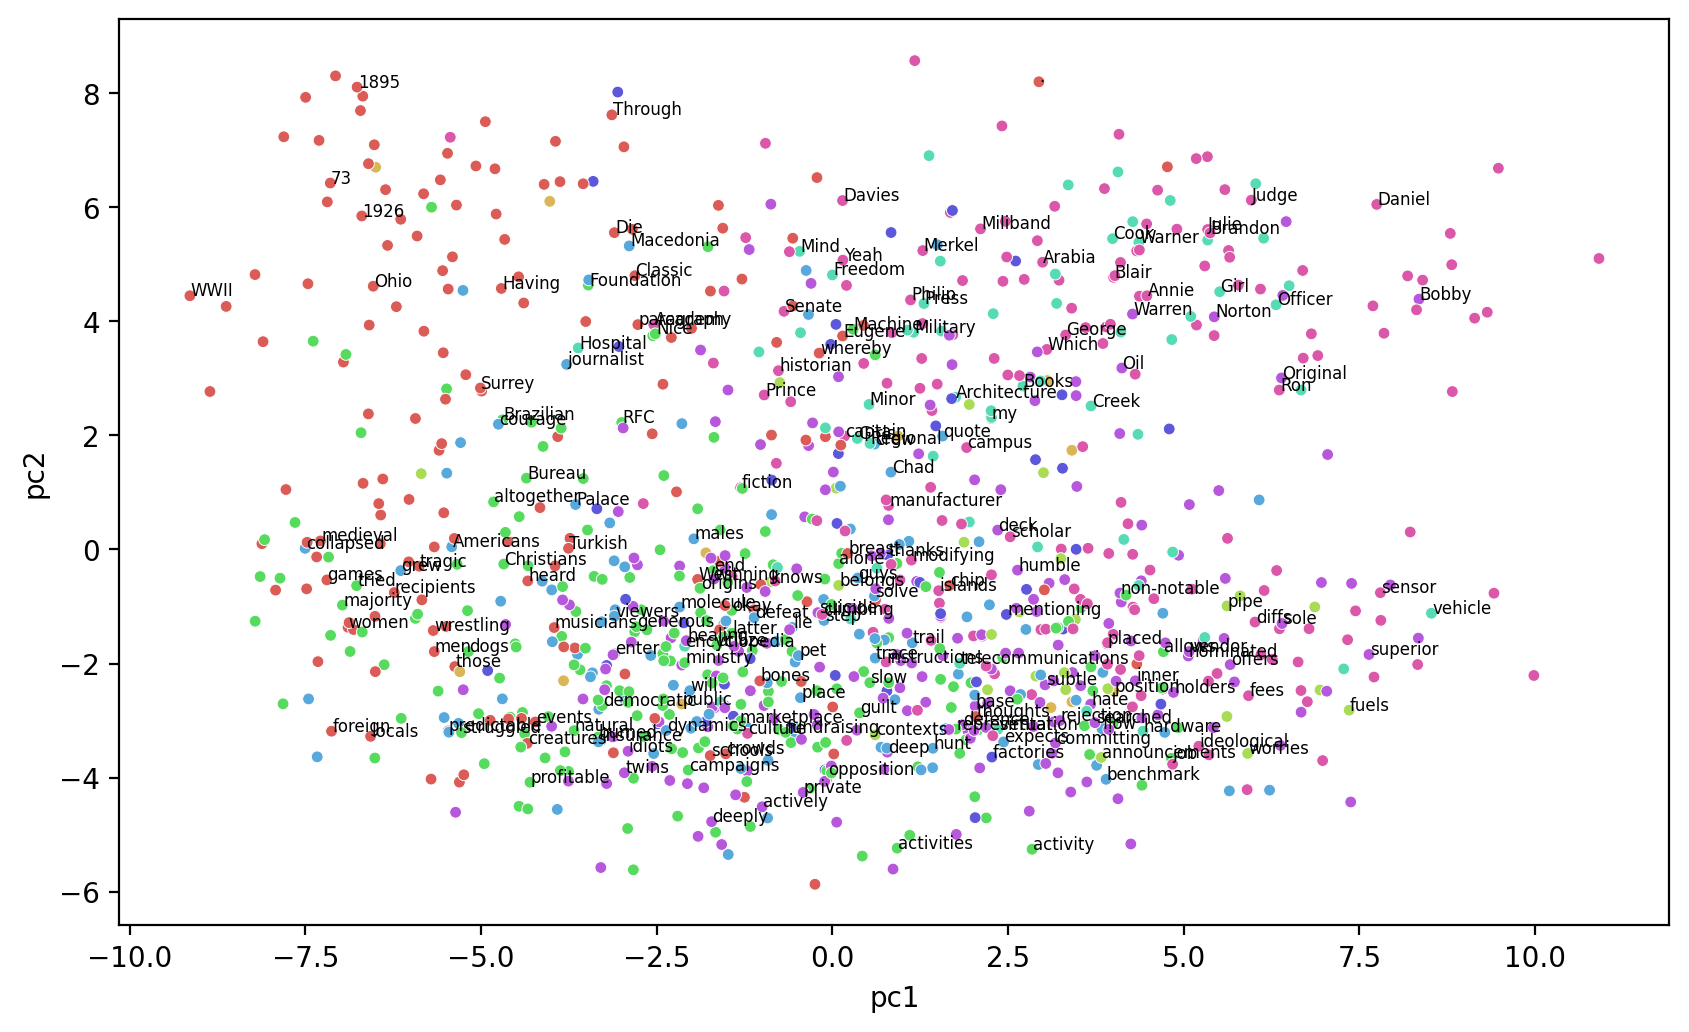

In [2]:
from conf import ART_VIGILANCE, ART_LEARNING_RATE


artnet = algorithms.ART1(
        step=ART_LEARNING_RATE,
        rho=ART_VIGILANCE,
        n_clusters=N_CLUSTERS,
        shuffle_data=False
    )
evaluation.report_model(artnet, data_bin, words, "ART")

## Explore parameters

In [10]:
results = evaluation.art_explore_parameters(data_bin, vigilances=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], learning_rates = None, n_clusters_settings=[5,10,20,50, 100, 200])
display(results)


,vigilance,learning_rate,silhouette_score,n_clusters
0,0.1,0.1,-0.001333,5
1,0.1,0.1,-0.019525,10
2,0.1,0.1,-0.029978,20
3,0.1,0.1,-0.056136,50
4,0.1,0.1,-0.063295,100
5,0.1,0.1,-0.077710,200
6,0.2,0.1,0.013468,5
7,0.2,0.1,-0.017545,10
8,0.2,0.1,-0.020050,20
9,0.2,0.1,-0.057092,50


<AxesSubplot:xlabel='vigilance', ylabel='silhouette_score'>

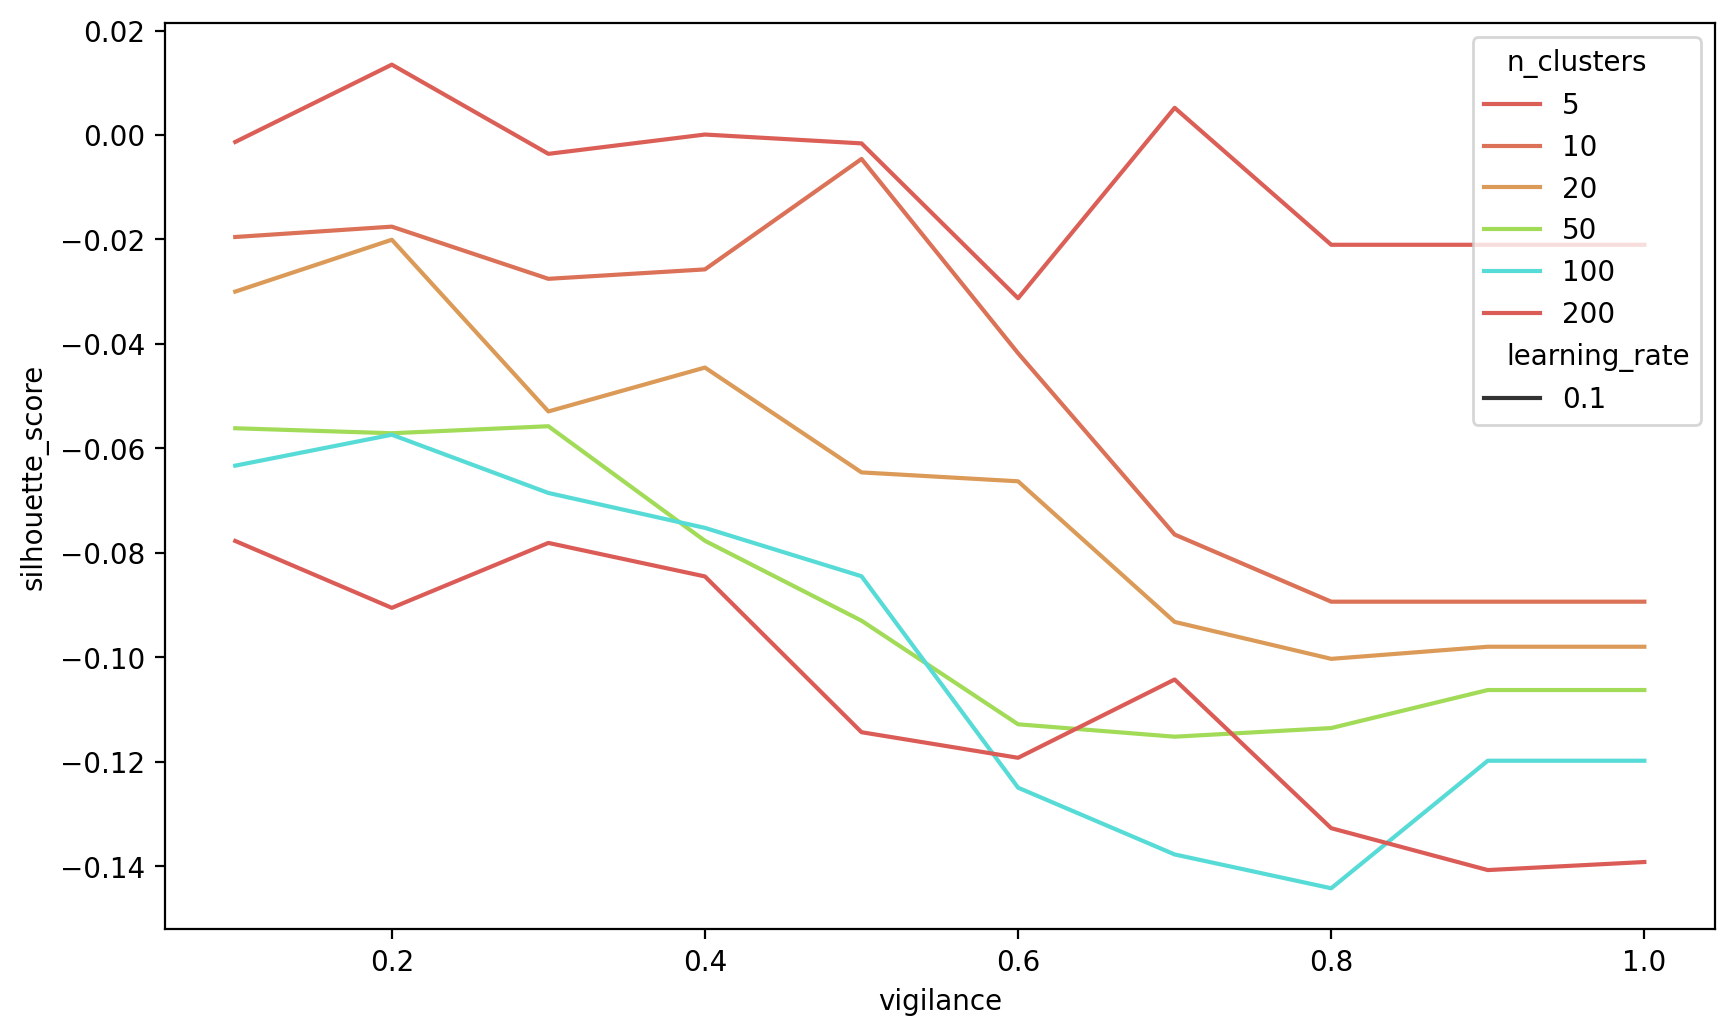

In [11]:
import seaborn as sns
sns.lineplot(data=results, x="vigilance", y="silhouette_score", style="learning_rate", hue="n_clusters", palette="hls")

# Other clustering methods

## Agglomerative clustering

Silhouette score: 0.02743482939536411


clusters,0,1,2,3,4,5,6,7,8,9
0,an,but,by,.,April,11,Sri,User,plants,Information.png
1,name,will,which,!,e.g.,2008,Tamil,Contribs,compound,
2,think,so,what,D,Jan,today,,,tribes,
3,place,only,my,N,Sometimes,There,,,vegetables,
4,sources,than,me,La,whereby,million,,,creatures,
5,public,both,why,L,Apr,She,,,planets,
6,school,many,What,M,,earlier,,,militia,
7,issues,those,Thank,El,,First,,,backgrounds,
8,further,without,president,«,,100,,,buttons,
9,position,well,student,GNG,,War,,,robots,


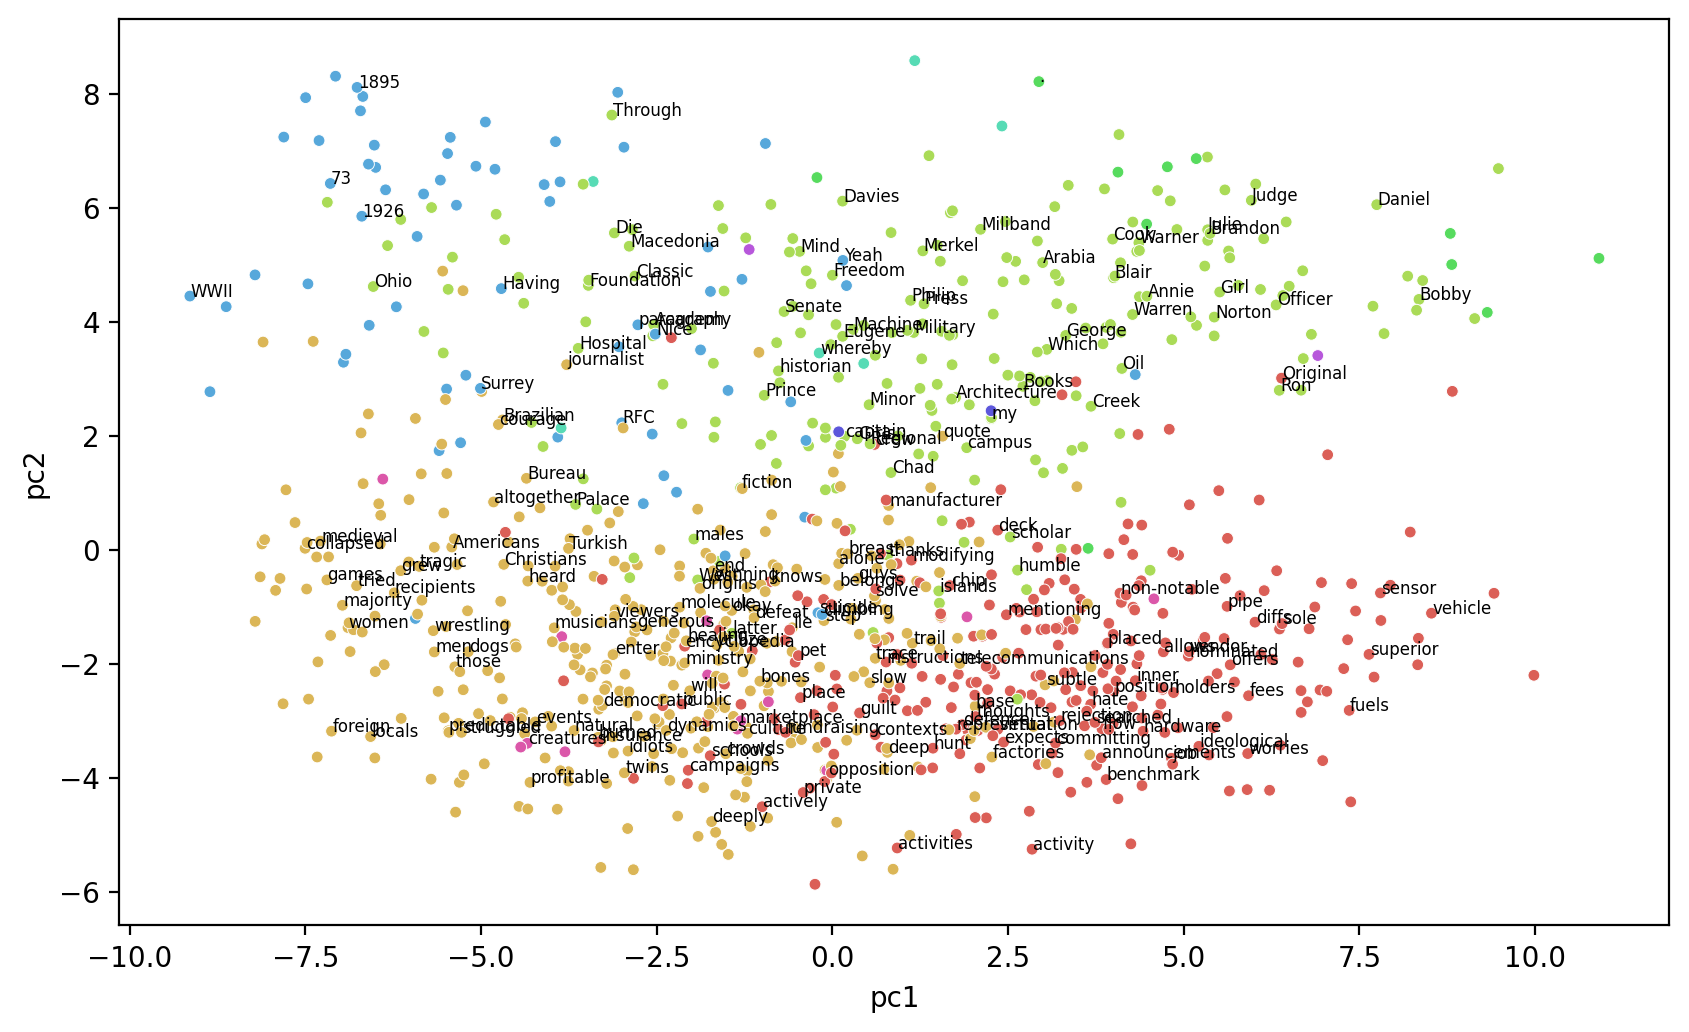

In [5]:

# For binary, manhattan=hamming
agg = cluster.AgglomerativeClustering(n_clusters=N_CLUSTERS, affinity="manhattan", linkage="average")
evaluation.report_model(agg, data_bin, words, "Agglomerative clustering")

## OPTICS

Silhouette score: -0.052640406963524115


clusters,-1,0,1,2,3,4,5
0,by,.,David,1972,1900,wonderful,11
1,which,!,George,1975,1913,sad,35
2,but,D,Mark,1971,1903,tragic,32
3,an,N,Chris,1966,1902,awesome,48
4,will,L,Daniel,1962,1898,pleasant,41
5,so,M,Frank,1956,1899,,43
6,only,«,Alex,1952,1895,,54
7,what,×,Simon,1926,,,73
8,my,,Anthony,,,,81
9,than,,Blair,,,,


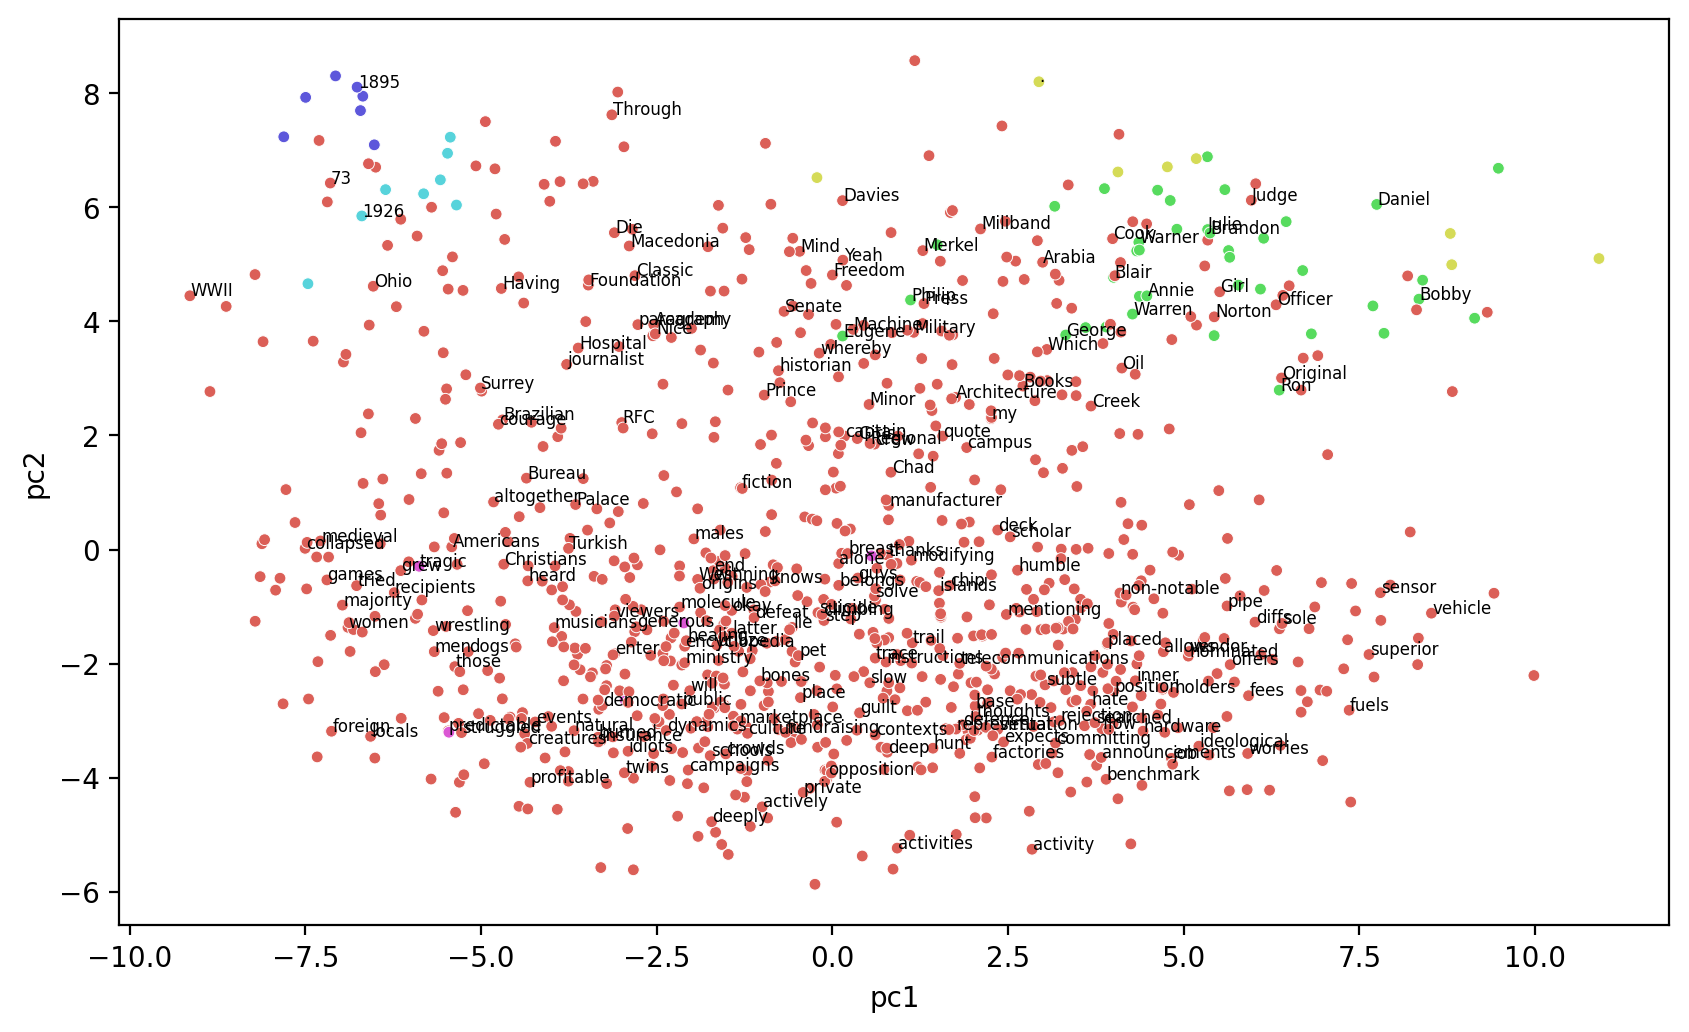

In [6]:

opt = cluster.OPTICS(metric="hamming")
evaluation.report_model(opt, data_bin, words, "OPTICS")

## Affinity propagation (distance metric correct?)

Silhouette score: 0.0401572635281337


clusters,0,1,2,3,4,5,6,7,8,9,...,88,89,90,91,92,93,94,95,96,97
0,.,which,both,place,women,what,only,sources,school,adding,...,layer,placed,my,leaving,April,hate,Team,available,clear,Kings
1,!,but,many,remember,men,What,really,programs,schools,changing,...,Total,renamed,clean,Lake,e.g.,idiot,Stop,reliable,correct,Saints
2,,so,those,era,Men,Are,find,operations,pupils,removing,...,curve,nominated,en,Anthony,Jan,idiots,Line,limited,longer,Eagles
3,,without,something,enter,males,Hey,always,lists,,dismissed,...,discharge,privately,historic,Moore,Apr,,El,tested,missing,Southampton
4,,There,study,currency,dozen,Which,end,classes,,finishing,...,bonus,endorsed,breast,Khan,,,Creek,maintained,Its,F.C.
5,,altogether,further,bear,miners,Make,therefore,practices,,fixing,...,elevation,withdrawn,bare,Cook,,,eliminate,calculated,expression,Swansea
6,,Having,must,operator,shower,Whatever,automatically,insurance,,updating,...,sensor,depressed,pale,Mac,,,que,initiated,mentioning,
7,,anymore,lives,theater,souls,,absolutely,campaigns,,modifying,...,acceleration,,,Alberta,,,Oil,invented,stub,
8,,Sometimes,higher,destination,,,ignored,donations,,kidnapping,...,,,,Warner,,,Route,specialized,exact,
9,,,basic,fence,,,assumed,behaviors,,inserting,...,,,,Phillips,,,Front,succeeded,un,


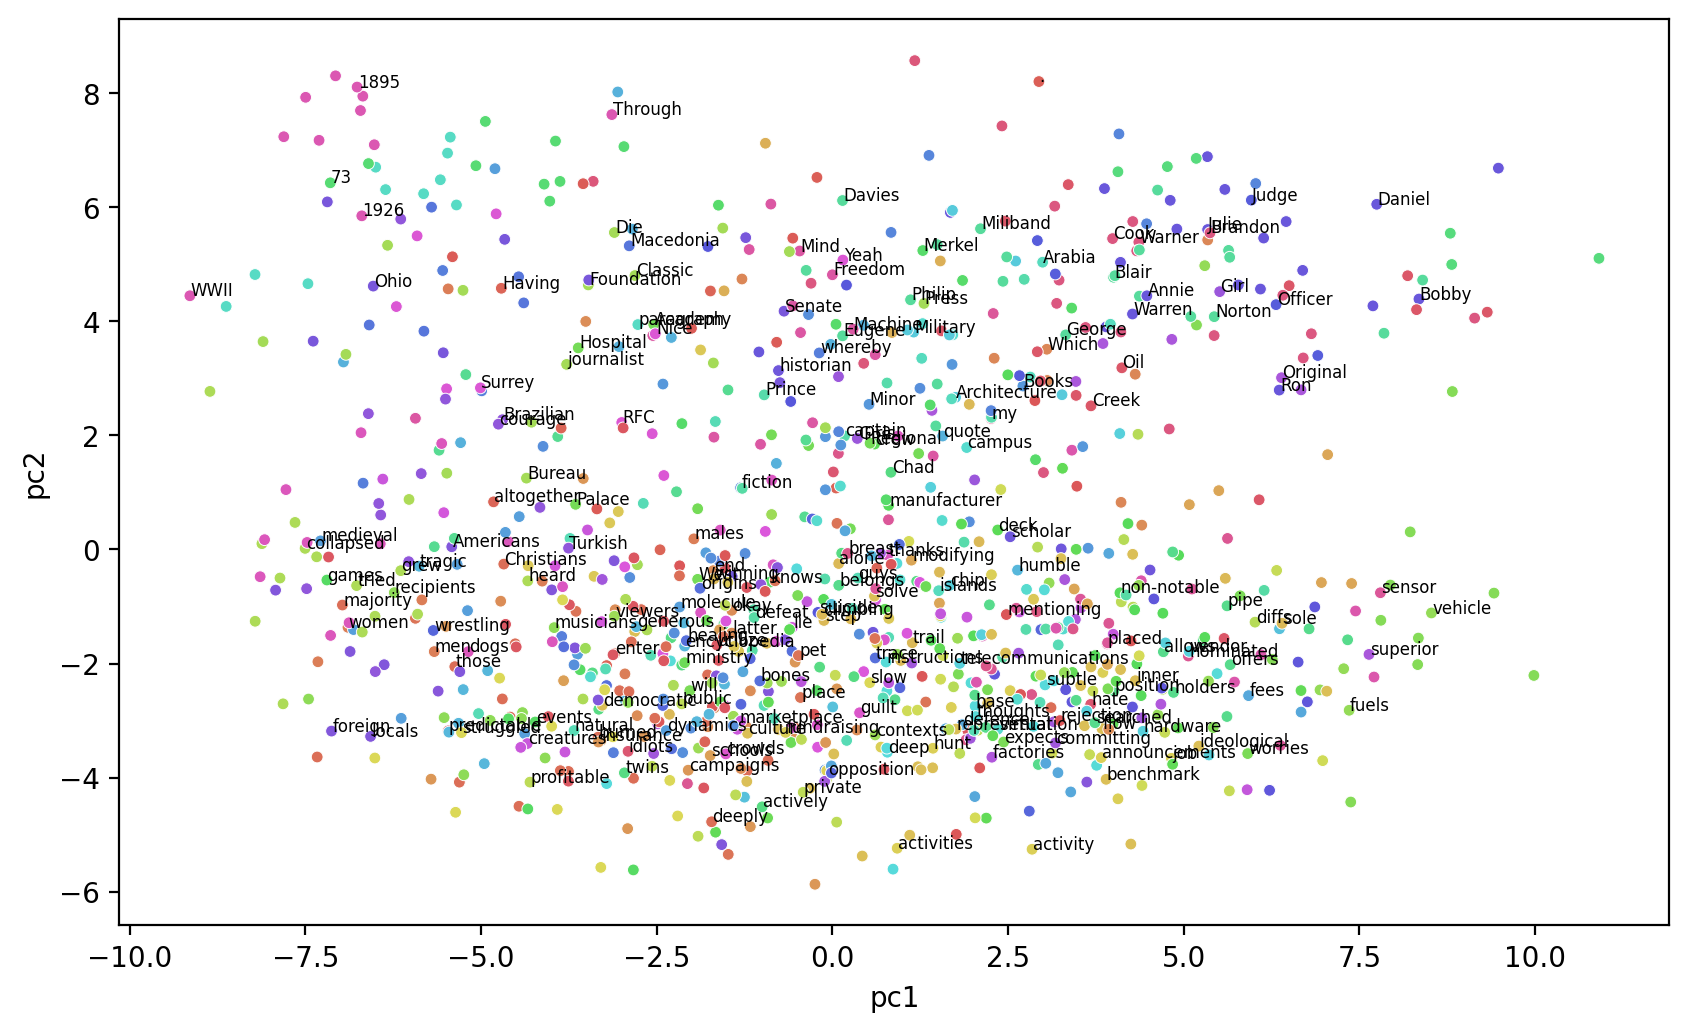

In [7]:
aff = cluster.AffinityPropagation(random_state=None)
evaluation.report_model(aff, data_bin, words, "Affinity propagation")

## SOM (NeuPy)

Silhouette score: 0.05892241725456522


clusters,0,1,2,3,4,5,6,7,8,9
0,What,2008,'m,.,will,but,which,what,by,those
1,There,April,David,!,so,an,my,me,further,sources
2,User,1997,George,11,than,only,why,name,student,public
3,First,1972,Mark,100,both,many,water,think,adding,family
4,II,1975,Chris,35,school,without,Thank,issues,remove,women
5,Two,1971,Lake,32,must,place,president,position,single,study
6,Street,1966,La,D,end,well,head,language,final,men
7,paragraph,1962,Daniel,48,available,really,am,job,base,programs
8,News,1956,Frank,N,She,something,Scotland,comments,leaving,events
9,Earth,1952,C.,41,named,find,York,official,bill,users


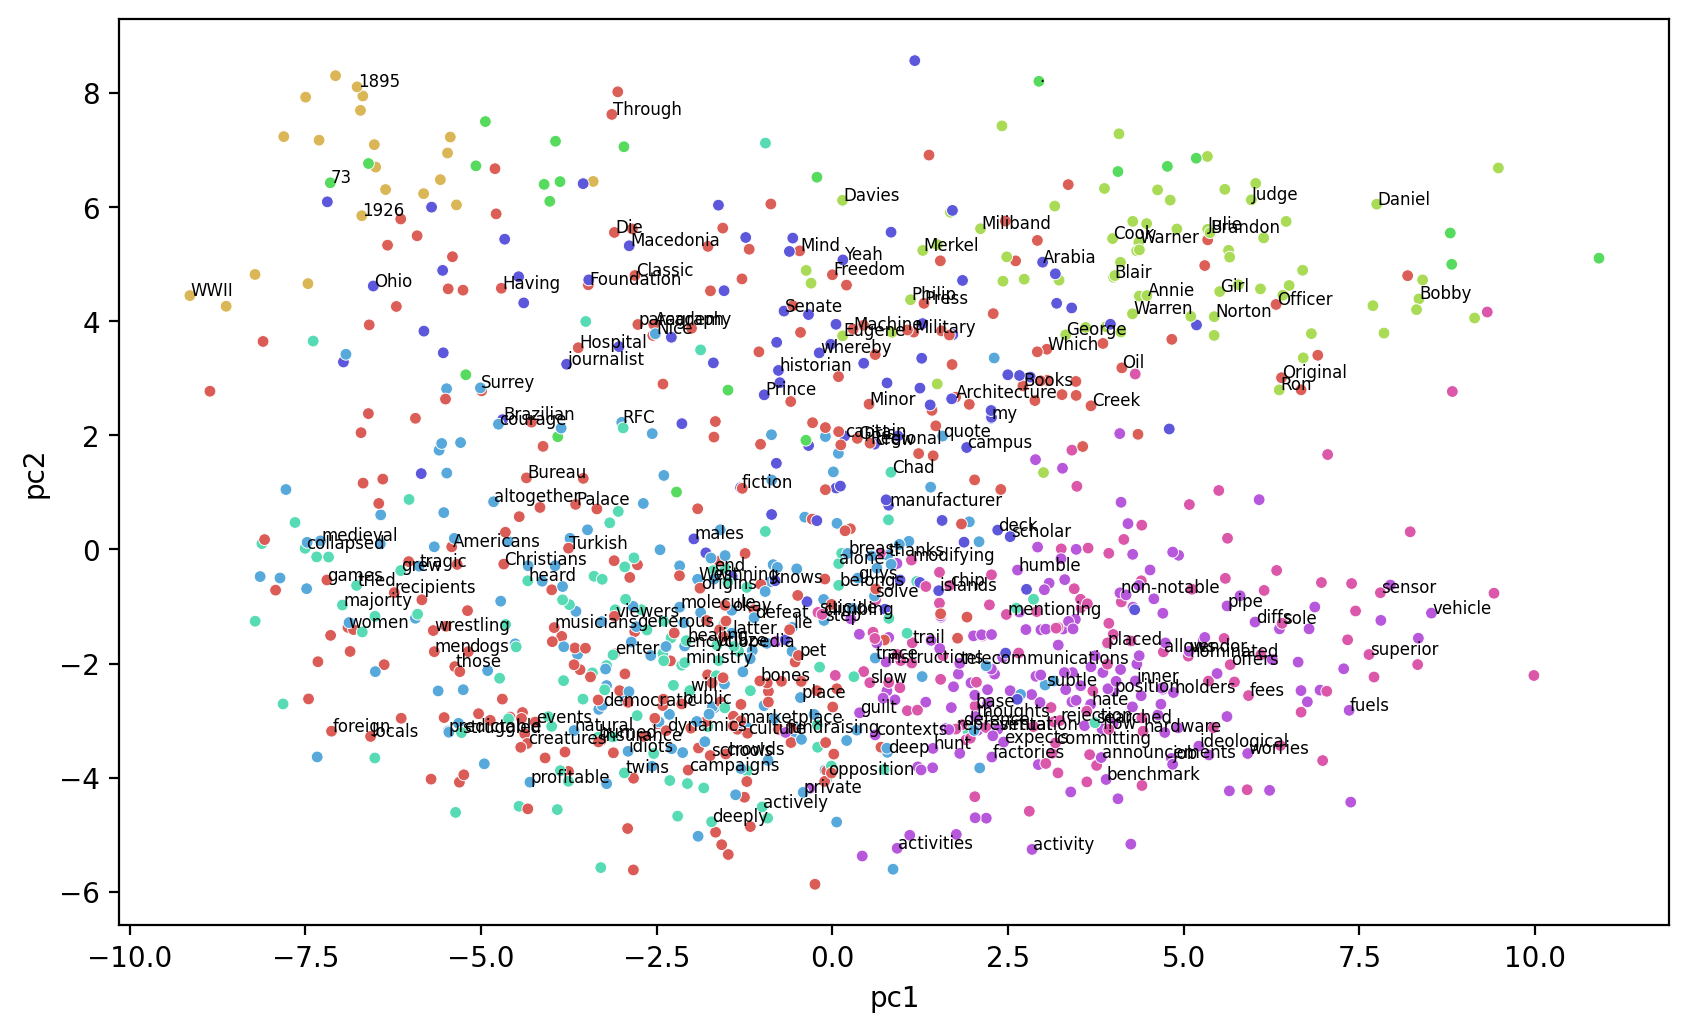

In [8]:
import numpy as np


som_neupy = algorithms.competitive.sofm.SOFM(n_inputs=dim, n_outputs=N_CLUSTERS)
evaluation.report_model(som_neupy, data_bin, words, "SOM-neupy")

## SOM (MiniSOM)

Silhouette score: 0.055178864671782124


clusters,0,1,2,3,4,5,6,7,8,9
0,2008,an,than,by,.,David,what,will,which,those
1,today,public,must,further,!,George,my,so,but,sources
2,million,water,available,student,11,Street,me,only,without,family
3,April,president,named,adding,Thank,Mark,name,both,well,women
4,games,official,alone,remove,She,Central,think,many,why,men
5,Scotland,economy,described,single,User,Senate,issues,place,What,programs
6,First,society,killed,base,35,Chris,position,really,fact,events
7,100,culture,appears,leaving,32,Press,language,something,There,users
8,War,reliable,allowed,bill,D,Lake,job,school,recent,schools
9,II,encyclopedia,seven,automatically,48,Sydney,comments,find,clear,activities


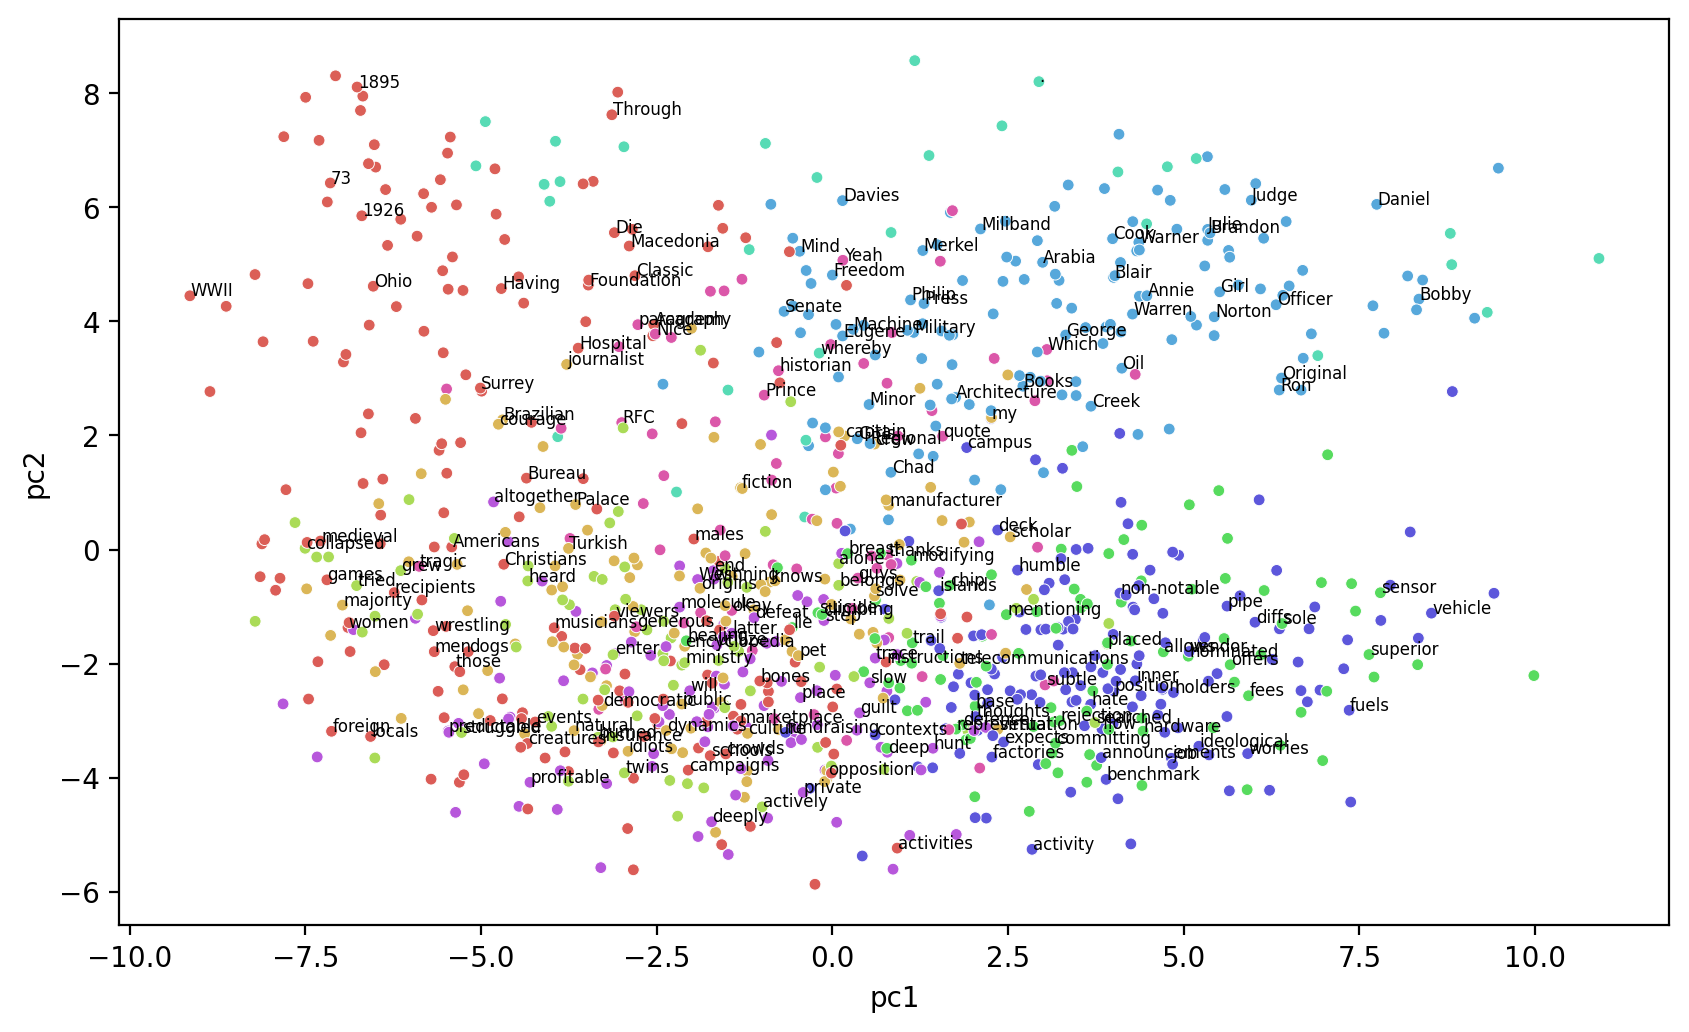

In [9]:
from minisom import MiniSom
som_minisom = MiniSom(1, N_CLUSTERS, dim, learning_rate=0.1, sigma=0.5)
evaluation.report_model(som_minisom, data_bin, words, "SOM-minisom", n_clusters=N_CLUSTERS)